# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [13]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# reproduzindo a regressão: tip ~ net_bill
modelo = smf.ols('tip ~ net_bill', data=tips).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           5.02e-23
Time:                        13:16:01   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

(0.0, 10.5)

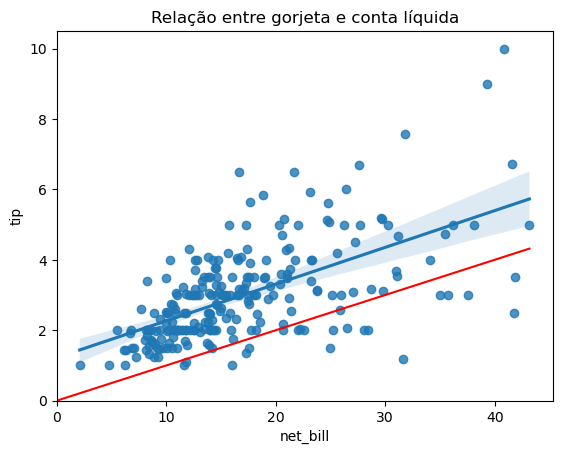

In [4]:
# gráfico de dispersão
sns.regplot(x = 'net_bill', y = 'tip', data = tips[tips['tip_pct']<0.5])
plt.title("Relação entre gorjeta e conta líquida")

# criando pontos para a linha dos 10%
x = np.linspace(0, tips['net_bill'].max(), 100)
y = .1 * x

# desenhando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# ajustando os eixos para começar do 0
plt.xlim(left = 0)
plt.ylim(bottom = 0)

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           5.02e-23
Time:                        13:16:01   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

(0.0, 0.5)

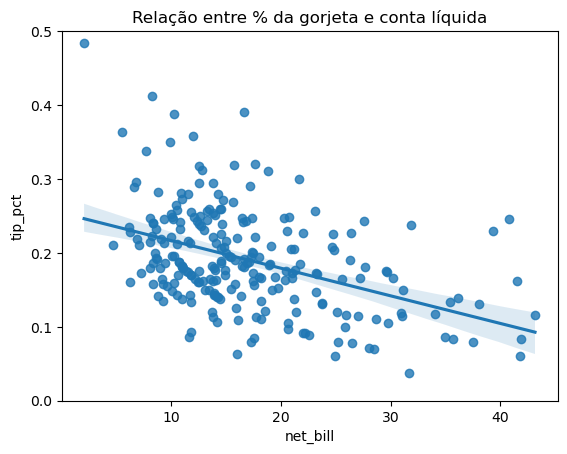

In [5]:
# reproduzindo a regressão: tip ~ net_bill
modelo2 = smf.ols('tip ~ net_bill', data=tips).fit()
print(modelo.summary())

# gráfico de dispersão
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips[tips['tip_pct']<0.5])
plt.title("Relação entre % da gorjeta e conta líquida")
plt.ylim(0, 0.5)

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

No primeiro gráfico, a relação entre as variáveis é positiva: quanto maior a conta líquida, maior tende a ser o valor da gorjeta. Já no segundo, a reta é descrescente, o que significa que essa relação é negativa, ou seja, quanto maior a conta líquida, menor é a porcentagem da gorjeta. Podemos então concluir que não faz sentido comparar os R² diretamente entre os dois modelos, porque cada um responde a uma pergunta distinta (uma em valores absolutos, outra em proporção).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [10]:
# 1. obtenha o valor predito 'pred' para 'tip_pct' (dica, veja o atributo reg.fittedvalues)
pred_tip_pct = modelo2.fittedvalues
pred_tip_pct

0      2.918050
1      2.192915
2      3.070031
3      3.354125
4      3.414719
         ...   
239    3.626300
240    3.831920
241    3.383925
242    2.926990
243    2.898184
Length: 244, dtype: float64

In [11]:
# 2. obtenha o valor predito para tip como 'tip_pct' * 'net_bill'
pred_tip = pred_tip_pct * tips['net_bill']
pred_tip

0      46.630446
1      19.034500
2      53.756242
3      68.323532
4      71.640801
         ...    
239    83.803782
240    96.487751
241    69.945737
242    47.036737
243    45.733339
Length: 244, dtype: float64

In [14]:
# 3. calcule o R² do modelo para 'tip'
r2_convertido = r2_score(tips['tip'], pred_tip)
print("R² do modelo convertido (tip_pct * net_bill):", r2_convertido)

R² do modelo convertido (tip_pct * net_bill): -2563.263877729571


In [15]:
# 4. compare esse R² com o do item 1
print("R² do modelo direto (tip ~ net_bill):", modelo.rsquared)

R² do modelo direto (tip ~ net_bill): 0.3325407312323705


O modelo 'tip' ~ 'net_bill' tem um R² maior, porque ele foi ajustado especificamente para explicar tip. Já o modelo convertido 'tip_pct' ~ 'net_bill' possui um R² menor porque usa duas etapas e perde um pouco de precisão.